# Source the dataset files from kaggle

In [ ]:
import os
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nadyinky/sephora-products-and-skincare-reviews")

print("Path to dataset files:", path)

dataset_dir = "/dataset"
src_path = "/kaggle/input/sephora-products-and-skincare-reviews/*"

if os.path.exists(dataset_dir):
    print("Folder already exists. Skipping mkdir and copy.")
    !cp $src_path* $dataset_dir
    print("Dataset copied to /dataset.")

else:
    print("Folder not found. Creating and copying dataset...")
    os.makedirs(dataset_dir, exist_ok=True)

    !cp $src_path* $dataset_dir
    print("Dataset copied to /dataset.")

100%|██████████| 147M/147M [00:00<00:00, 202MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/nadyinky/sephora-products-and-skincare-reviews/versions/2
Folder not found. Creating and copying dataset...
cp: cannot stat '/kaggle/input/sephora-products-and-skincare-reviews/**': No such file or directory
Dataset copied to /dataset.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Combine dataset files

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

product_info_path = os.path.join(path, "product_info.csv")
df_product_info = pd.read_csv(product_info_path)
df_reviews_0_250 = pd.read_csv(os.path.join(path, "reviews_0-250.csv"))
df_reviews_250_500 = pd.read_csv(os.path.join(path, "reviews_250-500.csv"))
df_reviews_500_750 = pd.read_csv(os.path.join(path, "reviews_500-750.csv"))
df_reviews_750_1250 = pd.read_csv(os.path.join(path, "reviews_750-1250.csv"))
df_reviews_1250_end = pd.read_csv(os.path.join(path, "reviews_1250-end.csv"))

/tmp/ipython-input-1328956371.py:8: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_reviews_0_250 = pd.read_csv(os.path.join(path, "reviews_0-250.csv"))
/tmp/ipython-input-1328956371.py:11: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_reviews_750_1250 = pd.read_csv(os.path.join(path, "reviews_750-1250.csv"))
/tmp/ipython-input-1328956371.py:12: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_reviews_1250_end = pd.read_csv(os.path.join(path, "reviews_1250-end.csv"))


# Explarotary Data Analysis

## Data checking

In [ ]:
df_product_info.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


In [ ]:
review_chunks = [
    df_reviews_0_250,
    df_reviews_250_500,
    df_reviews_500_750,
    df_reviews_750_1250,
    df_reviews_1250_end
]

df_all_reviews = pd.concat(review_chunks, ignore_index=True)

print(f"Total number of review chunks combined: {len(review_chunks)}")
print(f"Shape of the final combined DataFrame (Rows, Columns): {df_all_reviews.shape}")

Total number of review chunks combined: 5
Shape of the final combined DataFrame (Rows, Columns): (1094411, 19)


## Head of combined dataframe

In [ ]:
df_all_reviews.head()

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [ ]:
!pip install missingno

In [ ]:
df_all_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094411 entries, 0 to 1094410
Data columns (total 19 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Unnamed: 0                1094411 non-null  int64  
 1   author_id                 1094411 non-null  object 
 2   rating                    1094411 non-null  int64  
 3   is_recommended            926423 non-null   float64
 4   helpfulness               532819 non-null   float64
 5   total_feedback_count      1094411 non-null  int64  
 6   total_neg_feedback_count  1094411 non-null  int64  
 7   total_pos_feedback_count  1094411 non-null  int64  
 8   submission_time           1094411 non-null  object 
 9   review_text               1092967 non-null  object 
 10  review_title              783757 non-null   object 
 11  skin_tone                 923872 non-null   object 
 12  eye_color                 884783 non-null   object 
 13  skin_type                 9

<Figure size 2500x2000 with 0 Axes>

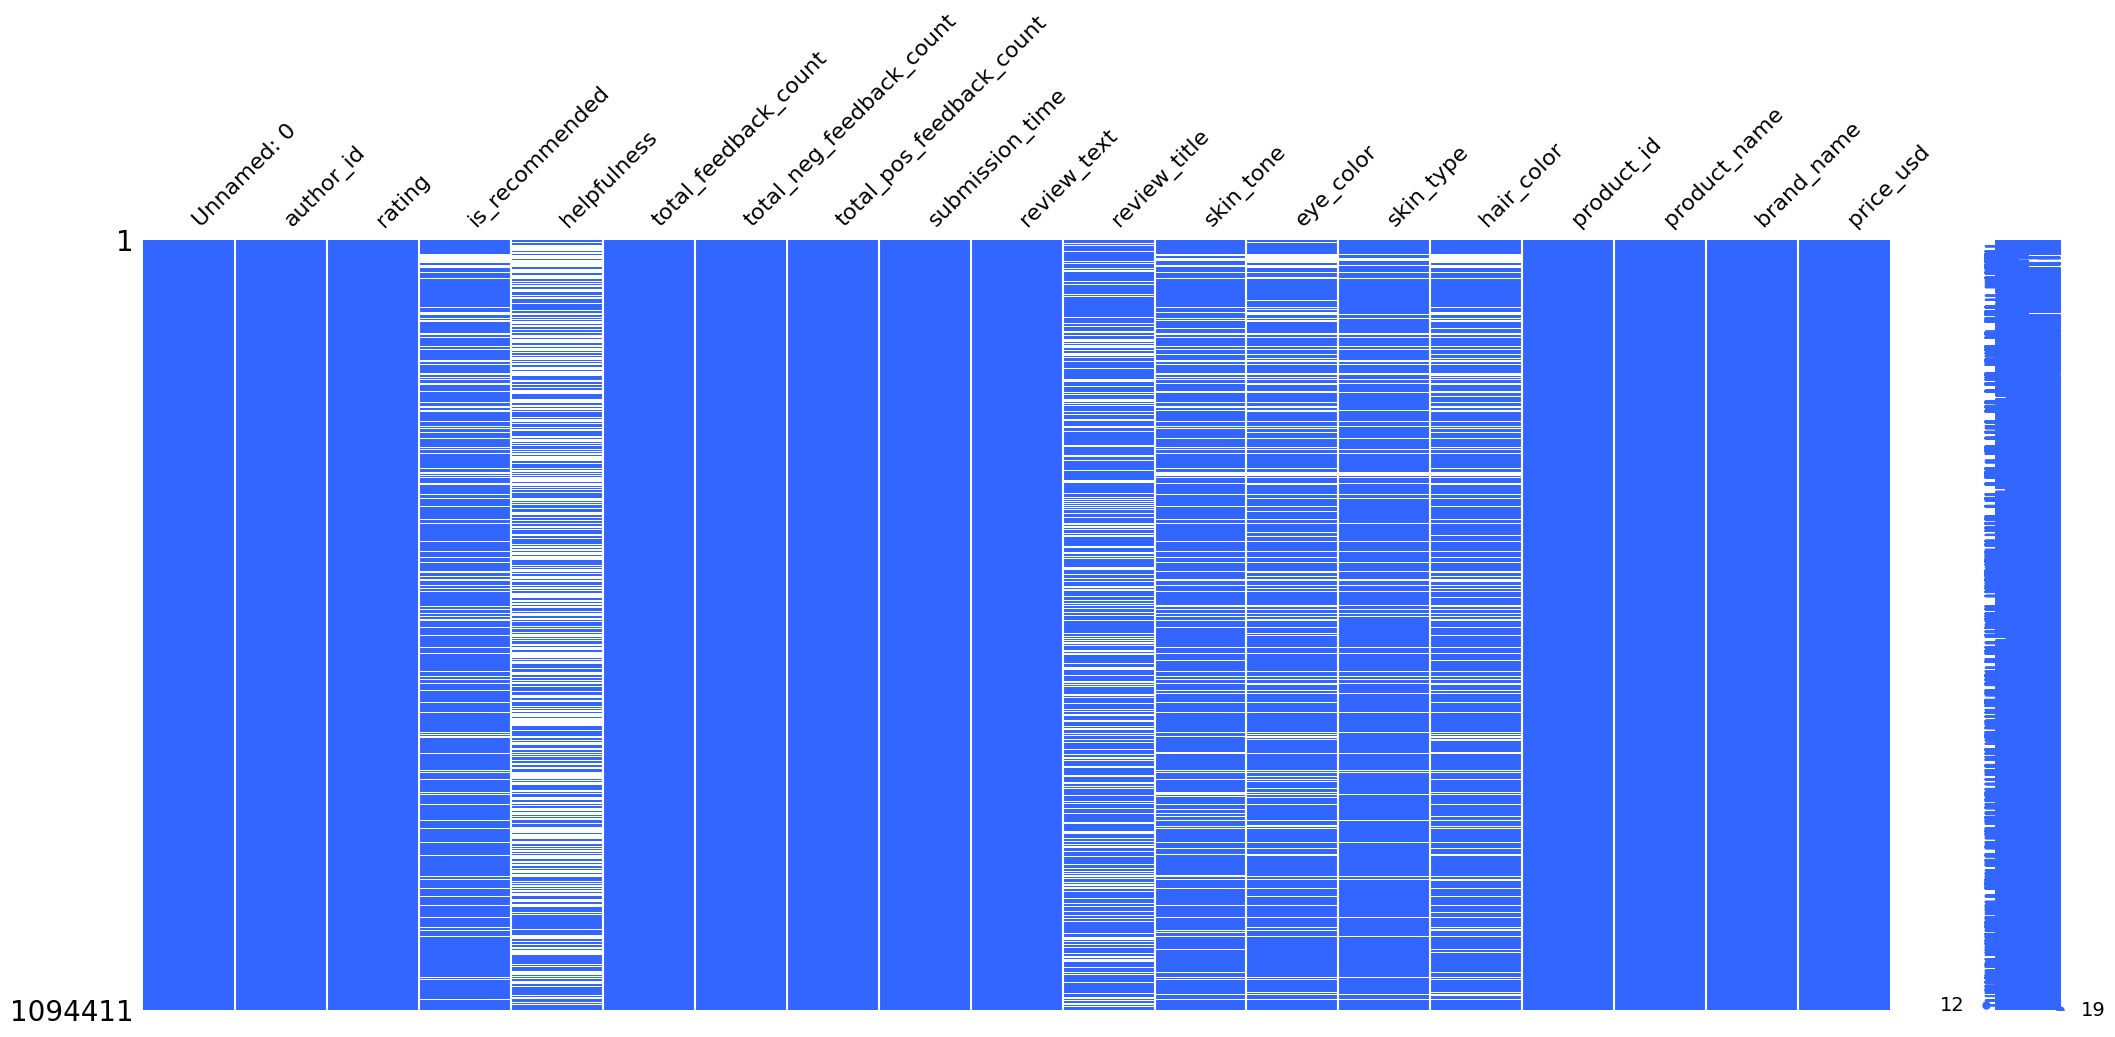

In [ ]:
import missingno as msno
plt.figure(figsize=(25, 20))
msno.matrix(df_all_reviews, color=[0.2, 0.4, 1])
plt.show()

# Data preprocessing

## Sampling

Calculate the word count in all dataset

In [ ]:
df_all_reviews['combined_text'] = df_all_reviews['review_title'].fillna("") + " " + df_all_reviews['review_text'].fillna("")

# Filter too short or long reviews
df_all_reviews['word_count'] = df_all_reviews['combined_text'].astype(str).apply(lambda x: len(x.split()))

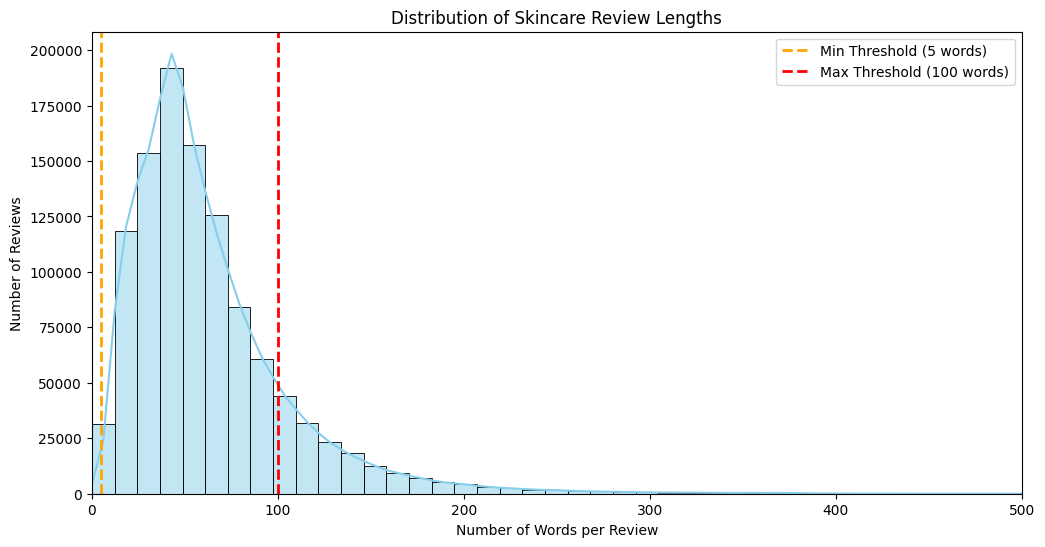

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Plot the distribution
sns.histplot(df_all_reviews['word_count'], bins=100, kde=True, color='skyblue')

# Add visual lines for your thresholds
plt.axvline(x=5, color='orange', linestyle='--', linewidth=2, label='Min Threshold (5 words)')
plt.axvline(x=100, color='red', linestyle='--', linewidth=2, label='Max Threshold (100 words)')

plt.title('Distribution of Skincare Review Lengths')
plt.xlabel('Number of Words per Review')
plt.ylabel('Number of Reviews')
plt.legend()
plt.xlim(0, 500) # Limit x-axis to see the main data clearly (ignoring extreme outliers)
plt.show()

Sampling the data to solve imbalance label and filter out the data (word count < 5 or > 100)

In [ ]:
from tqdm import tqdm

# Label y from rating
def label(rating):
    if rating >= 5:
        return 2
    elif rating <= 2:
        return 0
    else:
        return 1

df_filter_reviews = df_all_reviews[
    (df_all_reviews['word_count'] >= 5) &
    (df_all_reviews['word_count'] <= 100)
].copy()
df_filter_reviews['y'] = df_filter_reviews['rating'].apply(label)

counts = df_filter_reviews['y'].value_counts()
print("Filered data counts per class:")
print(counts)

min_class_size = 30000

dfSubset = df_filter_reviews.groupby('y').apply(
    lambda x: x.sample(n=min_class_size, random_state=42),
    include_groups=False
).reset_index()
dfSubset = dfSubset.drop(columns=['level_1'], errors='ignore')

counts = dfSubset['y'].value_counts()
print("Sampling data counts per class:")
print(counts)

Filered data counts per class:
y
2    600633
1    233761
0     98652
Name: count, dtype: int64
Sampling data counts per class:
y
0    30000
1    30000
2    30000
Name: count, dtype: int64


## Text Cleaning

In [ ]:
!pip install demoji
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 8.5 MB/s eta 0:00:00


In [ ]:
import re
import unicodedata as uni
import demoji
import contractions

url_pattern = re.compile(r"https\S+")
special_char_pattern = re.compile(r"[^\w\s]")

# Remove URL
def remove_urls(text):
    text = url_pattern.sub("", text)
    return text


# Normalize Unicode
def unicode_normalize(text):
    return uni.normalize('NFKD', text)

# Remove special characters
def remove_special_chararcters(text):
    text = special_char_pattern.sub("", text)
    return text

def standardize_number(text):
    text = re.sub(r'\d+', ' _num_ ', text)
    return text

# Remove unuseful space like " Hello   Good Morning. "
def remove_doublespaces(text):
  return " ".join(text.split())


# Clean emoji into text
def handle_emoji(string):
    emojis = demoji.findall(string)

    for emoji in emojis:
        string = string.replace(emoji, " " + emojis[emoji].split(":")[0])

    return string

# handle text contraction
def handle_contraction(text):
    text = contractions.fix(text)

    return text

In [ ]:
def clean_text(text):
    text = remove_urls(text)
    text = handle_contraction(text)
    text = unicode_normalize(text)
    text = handle_emoji(text)
    text = remove_special_chararcters(text)
    text = standardize_number(text)
    text = remove_doublespaces(text)
    return text.lower()

Save the cleaned data into reviews.csv for later process.

In [ ]:
import pandas as pd
from tqdm import tqdm

# Text Cleaning
partially_cleaned_texts = []
for text in tqdm(dfSubset["combined_text"], desc="Text Cleaning"):
    cleaned_text = clean_text(text)
    partially_cleaned_texts.append(cleaned_text)

clean_df = pd.DataFrame()
clean_df['y'] = dfSubset['y']
clean_df['review_title'] = dfSubset['review_title']
clean_df['review_text'] = dfSubset['review_text']
clean_df['clean_text'] = partially_cleaned_texts

Text Cleaning: 100%|██████████| 90000/90000 [04:46<00:00, 314.19it/s]


In [ ]:
clean_df['clean_text'].to_csv("/dataset/reviews.csv", index=False)
clean_df.head(10)

,y,review_title,review_text,clean_text
0,0,Disappointed.,I was optimistic about this products based upo...,disappointed i was optimistic about this produ...
1,0,Casket Ready,This product is not for black people! This wil...,casket ready this product is not for black peo...
2,0,Broke out,So the cleanser definitely made my face feel c...,broke out so the cleanser definitely made my f...
3,0,Wasn’t worth the hype for me,I was super excited to try this out since I’ve...,was not worth the hype for me i was super exci...
4,0,REALLY tried to like this,Don’t do it. Love farmacy and wanted to love t...,really tried to like this do not do it love fa...
5,0,Not good,I buy and use skin care products. After five e...,not good i buy and use skin care products afte...
6,0,Too drying for my skin,This cleanser did not work for me at all. I ha...,too drying for my skin this cleanser did not w...
7,0,Allergic reaction,Allergic reaction. Terrible skin rash. I never...,allergic reaction allergic reaction terrible s...
8,0,NaN,Started to severely irritate my second with th...,started to severely irritate my second with th...
9,0,Started out okay but got too dark,"Used about 3 maybe 4 drops with moisturizer, i...",started out okay but got too dark used about _...


## Text pre-processing

In [ ]:
!pip install symspellpy
!pip install fasttext

  Using cached fasttext-0.9.3.tar.gz (73 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-3.0.1-py3-none-any.whl.metadata (10.0 kB)
Using cached pybind11-3.0.1-py3-none-any.whl (293 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp312-cp312-linux_x86_64.whl size=4498212 sha256=f619a580e1567b268a91d5ea6c0cf494676f4d900a7f816bd677af0371b7658b
  Stored in directory: /root/.cache/pip/wheels/20/27/95/a7baf1b435f1cbde017cabdf1e9688526d2b0e929255a359c6
Successfully built fasttext


### Word Embedding

Load Fasttext Model

In [ ]:
import os
import pkg_resources
import re
import fasttext

fasttext_model_path = "/dataset/fasttext.bin"

# Load the FastText model
if os.path.exists(fasttext_model_path):
  print(f"Model found at {fasttext_model_path}. Loading model...")
  ft_model = fasttext.load_model(fasttext_model_path)
else:
  print("Model not found. Starting training...")
  ft_model = fasttext.train_unsupervised("/dataset/reviews.csv", model='skipgram', epoch=10, dim=300, wordNgrams=2, minCount=10, verbose=2)
  ft_model.save_model(fasttext_model_path)


typo = "pri" # The typo again
print(f"Nearest neighbors to typo '{typo}': {ft_model.get_nearest_neighbors(typo)}")

Model not found. Starting training...
Nearest neighbors to typo 'pri': [(0.671366274356842, 'prix'), (0.6505951285362244, 'prime'), (0.6171022057533264, 'primes'), (0.6070395708084106, 'print'), (0.593891441822052, 'primary'), (0.5668752789497375, 'prize'), (0.5625900030136108, 'prior'), (0.5457572937011719, 'primed'), (0.5341218709945679, 'primer'), (0.5301395058631897, 'priming')]


### Spelling Correction

In [ ]:
import numpy as np
import pkg_resources
from symspellpy import SymSpell, Verbosity
import fasttext
from scipy.spatial.distance import cosine

# Load SymSpell
sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)
dictionary_path = pkg_resources.resource_filename(
    "symspellpy", "frequency_dictionary_en_82_765.txt"
)
sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)


def get_similarity(word1, word2):
    v1 = ft_model.get_word_vector(word1)
    v2 = ft_model.get_word_vector(word2)

    # Cosine Similarity Formula
    return 1 - cosine(v1, v2)


def semantic_spell_check(text, threshold=0.75):
    words = text.split()
    corrected_words = []

    for word in words:
        # Ask SymSpell for a suggestion
        suggestions = sym_spell.lookup(word, Verbosity.TOP, max_edit_distance=2)

        if not suggestions:
            # No suggestion found, keep original
            corrected_words.append(word)
            continue

        candidate = suggestions[0].term

        # If SymSpell says it's already correct, move on
        if candidate == word:
            corrected_words.append(word)
            continue

        # Check if the 'Typo' and the 'Correction' mean roughly the same thing
        similarity = get_similarity(word, candidate)

        if similarity >= threshold:
            corrected_words.append(candidate) # Accept Correction
        else:
            corrected_words.append(word) # Reject Correction (Keep Original)

    return corrected_words


# TEST CASES
# original = ""
# result = semantic_spell_check(original)
# print(f"Original: {original} -> Result: {result}")

In [ ]:
# Text Spelling Correction
final_cleaned_texts = []
for text in tqdm(clean_df["clean_text"], desc="Spelling Correction"):
    corrected_text = semantic_spell_check(text)
    final_cleaned_texts.append(corrected_text)

final_clean_df = pd.DataFrame()
final_clean_df['y'] = clean_df['y']
final_clean_df['review_title'] = clean_df['review_title']
final_clean_df['review_text'] = clean_df['review_text']
final_clean_df['clean_text'] = final_cleaned_texts

### Remove Stop words

In [ ]:
!pip install nltk

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

en_stopwords = set(stopwords.words('english'))
def remove_stopwords(text):
  return [word for word in text if word not in en_stopwords]

### Extract Nouns

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

def extract_nouns(text):
    doc = nlp(text)
    return [token.lemma_ for token in doc if token.pos_ in ["NOUN", "PROPN"] and len(token.text) > 2]

In [ ]:
non_stopword_texts = []
noun_texts = []
for text in tqdm(final_clean_df["clean_text"], desc="Removing stop word..."):
    removed_text = remove_stopwords(text)
    nouns = extract_nouns(" ".join(removed_text))
    non_stopword_texts.append(removed_text)
    noun_texts.append(nouns)
final_clean_df["clean_text"] = non_stopword_texts
final_clean_df["noun_text"] = noun_texts

In [ ]:
final_clean_df.to_csv("/dataset/clean_reviews.csv")
final_clean_df.head(10)

In [ ]:
# !pip install langdetect
# !pip install googletrans

In [ ]:
# from googletrans import Translator
# import asyncio # Import asyncio for running async functions


# async def translate_text(text, dest_lang='en'):
#     translator = Translator()
#     # Await the translate method as it returns a coroutine
#     translated = ""
#     for word in text.split():
#       translated = translated + (await translator.translate(word, dest=dest_lang)).text + " "

#     return translated



In [ ]:
# download to google drive (self edit path)
# clean_df.to_csv('/content/drive/MyDrive/Colab Notebooks/clean_reviews.csv', index=False)

# Latent Dirichlet Allocation (LDA)

In [ ]:
!pip install gensim

In [ ]:
data_words = final_clean_df['noun_text'].values.tolist()

In [ ]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

In [ ]:
from gensim.models import LdaMulticore
from gensim.models import LdaModel
from pprint import pprint

# Build LDA model
lda_model = LdaMulticore(corpus=corpus, id2word=id2word,
                     num_topics=12, iterations=100)


topics = lda_model.show_topics(num_topics=12, num_words=10, formatted=False)

# Print nicely
for topic_no, topic_words in topics:
    words = [word for word, prob in topic_words]
    print(f"Topic {topic_no}: {', '.join(words)}")

In [ ]:
primary_list = df_product_info["primary_category"].unique().tolist()
secondary_list = df_product_info["secondary_category"].unique().tolist()
tertiary_list = df_product_info["tertiary_category"].unique().tolist()

print(primary_list)
print(secondary_list)
print(tertiary_list)

In [ ]:
from collections import Counter

# Flatten all words
all_words = [word for tokens in final_clean_df['noun_text'] for word in tokens]

# Count frequencies
word_counts = Counter(all_words)
word_counts